In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import os
import seaborn as sns


In [2]:
dataset = pd.read_csv('Documents/archive (1)/fraud_email_.csv')

In [3]:
dataset.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


In [4]:
dataset.shape

(11929, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    11928 non-null  object
 1   Class   11929 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 186.5+ KB


In [6]:
dataset.isnull().sum()

Text     1
Class    0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset.isnull().sum()

Text     0
Class    0
dtype: int64

In [9]:
dataset = dataset.drop_duplicates()

In [10]:
dataset.shape

(10249, 2)

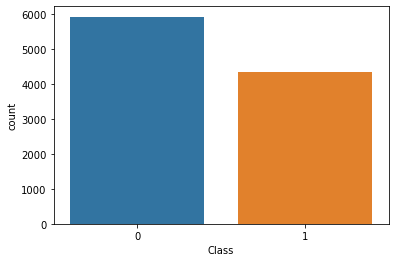

In [11]:
sns.countplot(data=dataset,x=dataset['Class'])
ply.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(dataset.Text,dataset.Class,test_size=0.25)

In [14]:
#converting the text into matrices
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
#multinomial is usually used for document classification

from sklearn.pipeline import Pipeline

In [17]:
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [18]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [19]:
print('Accuracy on testing set')
clf.score(X_test,y_test)

Accuracy on testing set


0.9691767460007803

In [20]:
clf.score(X_train,y_train)

0.9764506895654437